### 将所有图片的路径存到一个txt里面，然后shuffle，分为测试集和训练集

In [42]:
import pandas as pd
import cv2
import torchvision
import matplotlib.pyplot as plt
import numpy as np
import os
import random
Imgfolder = 'D:\\dataset\\NCT-CRC-HE-100K\\NCT-CRC-HE-100K'
image_ = []
label_ = []
tissues_name = os.listdir(Imgfolder)
for tis in tissues_name:
            tissues_dir = os.path.join(Imgfolder, tis)
            tissues_imgs = os.listdir(tissues_dir)
            for img in tissues_imgs:
                image_dir = os.path.join(tissues_dir,img)
                image_.append(image_dir)
                label_.append(tis)
ll = {"path":image_, "label":label_}                
df = pd.DataFrame(ll)
train = df[0:90000]
test = df[90001:100000]
train.to_csv('./readdata/NCT_CRC_train.csv')
test.to_csv('./readdata/NCT_CRC_test.csv')
df

,path,label
0,D:\dataset\NCT-CRC-HE-100K\NCT-CRC-HE-100K\ADI...,ADI
1,D:\dataset\NCT-CRC-HE-100K\NCT-CRC-HE-100K\ADI...,ADI
2,D:\dataset\NCT-CRC-HE-100K\NCT-CRC-HE-100K\ADI...,ADI
3,D:\dataset\NCT-CRC-HE-100K\NCT-CRC-HE-100K\ADI...,ADI
4,D:\dataset\NCT-CRC-HE-100K\NCT-CRC-HE-100K\ADI...,ADI
...,...,...
99995,D:\dataset\NCT-CRC-HE-100K\NCT-CRC-HE-100K\TUM...,TUM
99996,D:\dataset\NCT-CRC-HE-100K\NCT-CRC-HE-100K\TUM...,TUM
99997,D:\dataset\NCT-CRC-HE-100K\NCT-CRC-HE-100K\TUM...,TUM
99998,D:\dataset\NCT-CRC-HE-100K\NCT-CRC-HE-100K\TUM...,TUM


In [55]:
a = pd.read_csv('./readdata/NCT_CRC_test.csv')
pa = list(a['path'])
la = (a['label'])
aaa = list(zip(pa, la))


'D:\\dataset\\NCT-CRC-HE-100K\\NCT-CRC-HE-100K\\TUM\\TUM-HDQGTGHI.tif'

In [56]:
class GaussianBlur:
    def __init__(self, kernel_size, min=0.1, max=2.0):
        self.min = min
        self.max = max
        self.kernel_size = kernel_size

    def __call__(self, sample):
        sample = np.array(sample)
        prob = np.random.random_sample()
        if prob < 0.5:
            sigma = (self.max - self.min) * np.random.random_sample() + self.min
            sample = cv2.GaussianBlur(sample, (self.kernel_size, self.kernel_size), sigma)
        return sample
class Transforms:
    def __init__(self, size, s=1.0, mean=None, std=None, blur=False):
        self.train_transform = [
            torchvision.transforms.ToTensor(),
            torchvision.transforms.RandomResizedCrop(size=size),
            torchvision.transforms.RandomHorizontalFlip(),
            torchvision.transforms.RandomApply([torchvision.transforms.ColorJitter(0.8 * s, 0.8 * s, 0.8 * s, 0.2 * s)],
                                               p=0.8),
            torchvision.transforms.RandomGrayscale(p=0.2),
        ]
        if blur:
            self.train_transform.append(GaussianBlur(kernel_size=23))
        # self.train_transform.append(torchvision.transforms.ToTensor())
        self.test_transform = [
            torchvision.transforms.Resize(size=(size, size)),
            torchvision.transforms.ToTensor(),
        ]
        if mean and std:
            self.train_transform.append(torchvision.transforms.Normalize(mean=mean, std=std))
            self.test_transform.append(torchvision.transforms.Normalize(mean=mean, std=std))
        self.train_transform = torchvision.transforms.Compose(self.train_transform)
        self.test_transform = torchvision.transforms.Compose(self.test_transform)

    def __call__(self, x):
        return self.train_transform(x), self.train_transform(x)
trans = Transforms(100).train_transform
img = cv2.imread(aa[0][0])
print(type(img))
img = trans(img)
print(img.size())
print(type(img))

<class 'numpy.ndarray'>
torch.Size([3, 100, 100])
<class 'torch.Tensor'>


[0 0 0 0 1 0]
-0.31744292580140976


D:\jkj\envs\pytorch\lib\site-packages\sklearn\manifold\_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


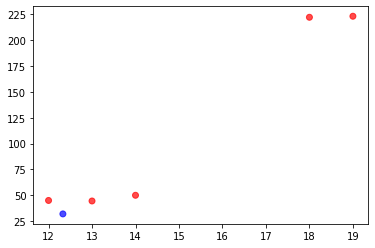

In [23]:
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.metrics import silhouette_score
import pandas as pd
import matplotlib.pyplot as plt


data = pd.DataFrame([[12,45],[13,44.5],[18,222],[19,223],[12.33,32],[14,50]],columns=list('ab'))
km = SpectralClustering(2)
pre = km.fit_predict(data)
print(pre)
SC = silhouette_score(data,pre)
print(SC)
color_dic = {0:'red',1:'blue',3:'black'}
colors = [color_dic[i] for i in pre]
plt.scatter(data.loc[:,'a'],data.loc[:,'b'],c=colors,alpha=0.7)
plt.show()


In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction import image
from sklearn.cluster import spectral_clustering

l = 100
x, y = np.indices((l, l))

center1 = (28, 24)
center2 = (40, 50)
center3 = (67, 58)
center4 = (24, 70)

radius1, radius2, radius3, radius4 = 16, 14, 15, 14

circle1 = (x - center1[0]) ** 2 + (y - center1[1]) ** 2 < radius1 ** 2
circle2 = (x - center2[0]) ** 2 + (y - center2[1]) ** 2 < radius2 ** 2
circle3 = (x - center3[0]) ** 2 + (y - center3[1]) ** 2 < radius3 ** 2
circle4 = (x - center4[0]) ** 2 + (y - center4[1]) ** 2 < radius4 ** 2

# #############################################################################
# 4 circles
img = circle1 + circle2 + circle3 + circle4

# We use a mask that limits to the foreground: the problem that we are
# interested in here is not separating the objects from the background,
# but separating them one from the other.
mask = img.astype(bool)

img = img.astype(float)
img += 1 + 0.2 * np.random.randn(*img.shape)

# Convert the image into a graph with the value of the gradient on the
# edges.
graph = image.img_to_graph(img, mask=mask)
print("graph:")
print(type(graph))
# Take a decreasing function of the gradient: we take it weakly
# dependent from the gradient the segmentation is close to a voronoi
graph.data = np.exp(-graph.data / graph.data.std())

# Force the solver to be arpack, since amg is numerically
# unstable on this example
data = np.random.randn(7,7) #= pd.DataFrame([[12,45],[13,44.5],[18,222],[19,223],[12.33,32],[14,50]],columns=list('ab'))
print(data)
labels = spectral_clustering(data, n_clusters=4, eigen_solver="arpack")
print(len(labels))
label_im = np.full(mask.shape, -1.0)
label_im[mask] = labels

plt.matshow(img)
plt.matshow(label_im)

# #############################################################################
# 2 circles
img = circle1 + circle2
mask = img.astype(bool)
img = img.astype(float)

img += 1 + 0.2 * np.random.randn(*img.shape)

graph = image.img_to_graph(img, mask=mask)
graph.data = np.exp(-graph.data / graph.data.std())

labels = spectral_clustering(graph, n_clusters=2, eigen_solver="arpack")
label_im = np.full(mask.shape, -1.0)
label_im[mask] = labels

plt.matshow(img)
plt.matshow(label_im)

plt.show()

graph:
<class 'scipy.sparse.coo.coo_matrix'>
[[-1.08726525 -2.10656392  1.9110699   0.58699747 -0.19019452 -0.69028275
   0.90162652]
 [ 0.23853929  0.01702826 -0.11925146 -1.57959756  0.60794236  0.53809068
  -0.49516216]
 [ 0.87334192  1.94247988  0.77414016  0.63481905 -1.92032455  0.67973778
   0.54048491]
 [-0.65866735 -2.14674108  0.97732812 -1.94974393 -0.56162725 -0.06571866
   0.82819136]
 [ 0.41339528  0.61479908  0.61339875  0.97214226 -0.77938885  1.97665722
   1.57684375]
 [-0.28558774  0.75241089  0.13999286 -0.06785345 -1.85841441  0.80669095
  -0.5427386 ]
 [-0.36695048  1.17575017  0.85396381  0.08355387 -0.42873808 -0.97952585
  -1.10852545]]


D:\jkj\envs\pytorch\lib\site-packages\sklearn\utils\validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
D:\jkj\envs\pytorch\lib\site-packages\scipy\sparse\csgraph\_laplacian.py:118: RuntimeWarning: invalid value encountered in sqrt
  w = np.where(isolated_node_mask, 1, np.sqrt(w))


ValueError: array must not contain infs or NaNs

In [38]:
'''
input: K clusters, each cluster has different nums of vectors
'''
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score #用的是不是cosine distance?????
from sklearn.cluster import SpectralClustering
import pandas as pd

def Refinement(input, clus_label, clus_nums):
    '''
    params:
    embeddings: each vector stands for a image.
        embedding[0-k], embedding[i] is a group of cluster
    clus_label: clusters of each image. 
        dim = 1 X N
    clus_num: total nums of the clusters
    '''
    sc_pre = silhouette_score(input, clus_label)
    sc_best = sc_pre
    i = 0
    Scluster = SpectralClustering(1)
    #先按照clusters分类
    clusters = [[] for x in range(clus_nums)]
    for j, vec in enumerate(input):
        clusters[clus_label[j]].append(vec)
        
    while(i < clus_nums):
        # Bi-partition i-th cluster with spectral clustering
        temp = clusters[i]
        bi_partition_label = Scluster.fit_predict(temp)
        print(bi_partition_label)
        #
        bi_paritition_0 = []
        bi_paritition_1 = []
        clusters_temp = clusters
        for k, val in enumerate(bi_partition_label):
            if val == 0:
                bi_paritition_0.append(temp[k])
            else:
                bi_paritition_1.append(temp[k])
        clusters_temp.pop(0)
        clusters_temp.append(bi_paritition_0)
        clusters_temp.append(bi_paritition_1)
        #将cluster合并
        all_temp = []
        label_temp = []
        for i in range(len(clusters_temp)):
            all_temp.extend(clusters_temp[i])
            label_temp.extend([i for _ in range(len(clusters_temp[i]))])
        print(all_temp)
        print(label_temp)
        sc_new = silhouette_score(all_temp, label_temp)
        if sc_new > sc_best:
            sc_best = sc_new
            #更新clusters
            clusters.pop[i]
            clusters.append(bi_paritition_0)
            clusters.append(bi_paritition_1)
        #else就直接走
        return clusters
        


In [40]:
a = np.random.randn(7,7)
lab = np.array([1,1,1,1,0,0,1])
nn = Refinement(a, lab, 2)
print(nn)

[0 0]
[array([ 0.05810274, -0.05713758, -1.04462839, -1.31768102, -0.74328703,
        0.09857934,  1.32331636]), array([ 0.1672118 ,  0.3082765 ,  0.37050417, -0.18543914,  0.01248449,
       -0.45348339, -1.02292245]), array([ 1.85246238,  0.20836712, -0.43996939, -0.18392837,  0.15081476,
        0.3254346 , -0.68000899]), array([ 0.17225122,  0.94023439,  1.79190805,  0.28601435, -1.05798031,
        0.93601394,  1.7634666 ]), array([ 0.19997425,  0.82546105,  0.20180922,  0.79773011, -0.46598979,
        0.93880877,  0.02336085]), array([ 0.23345742, -0.88071665,  1.21991054,  0.1958813 , -0.80935025,
       -1.2104003 , -0.15330086]), array([-0.58850365,  0.13696167, -0.3559037 , -0.1704118 ,  0.81274734,
       -2.4040576 ,  0.53215618])]
[0, 0, 0, 0, 0, 1, 1]
[[array([ 0.05810274, -0.05713758, -1.04462839, -1.31768102, -0.74328703,
        0.09857934,  1.32331636]), array([ 0.1672118 ,  0.3082765 ,  0.37050417, -0.18543914,  0.01248449,
       -0.45348339, -1.02292245]), array(

D:\jkj\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "
